In [1]:
from qiskit import *

# Creating first quantum circuit

(A typical Hello World in quantum computing)
* Lets design a Quantum Circuit for creating one of the Bell States

-> Bell state |00⟩ + |11⟩:

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)


-> Bell state |00⟩ - |11⟩:

qc = QuantumCircuit(2)

qc.h(0)

qc.x(1)

qc.cx(0, 1)


-> Bell state |01⟩ + |10⟩:

qc = QuantumCircuit(2)

qc.x(0)

qc.h(0)

qc.cx(0, 1)


-> Bell state |01⟩ - |10⟩:

qc = QuantumCircuit(2)

qc.x(0)

qc.h(0)

qc.x(1)

qc.cx(0, 1)



In [42]:
circuit = QuantumCircuit(2,2)

In [43]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [83]:
# For making the output a bit more "Prettier"
%matplotlib inline

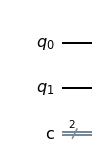

In [45]:
circuit.draw(output='mpl')

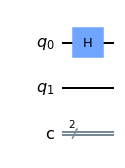

In [46]:
circuit.h(0)   # Initializing Hadamard Gate
circuit.draw(output='mpl')

In [47]:
# How to apply the same gate on multiple qubits?

# circuit.h([1,2])
# circuit.draw(output='mpl')

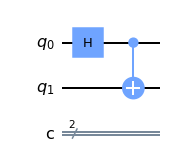

In [48]:
circuit.cx(0,1)    # C-Not gate
circuit.draw(output='mpl')

## Measuring a Qubit

> circuit.measure(#qubits, #classicalbits)

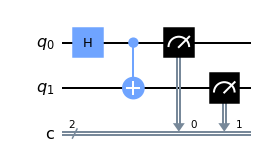

In [50]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

## Running on a Simulator

* All the simulators are located in the Aer module
* To get the list of all backends, to be more precise "SIMULATORS"
> Aer.backends()

In [61]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [52]:
simulator = Aer.get_backend('qasm_simulator')

In [53]:
res = execute(circuit, backend=simulator, shots = 512).result()  # default value of shots is 1024!

In [54]:
from qiskit.visualization import plot_histogram

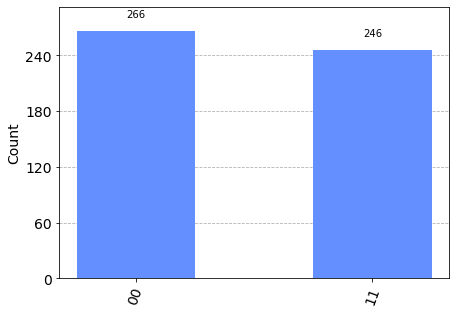

In [55]:
plot_histogram(res.get_counts(circuit))

# Exercise


* Till now we wrote a code for creating the 1st Bell State, now how about you all try create another Bell State?

# Quantum Computer?

* We are executing in quantum simulators till now, but how to execute in real quantum computers??
*  Quantum token we got in quantum-computing.ibm.com is very important for running the real quant. computers

In [58]:
IBMQ.save_account(open('QTok.txt', 'r').read())    # Saving your personal details and loading your account

# You need to change the above line depending upon how you are going to do it.

In [59]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [63]:
provider = IBMQ.get_provider('ibm-q')

In [65]:
# Getting a list of all the available backends on the IBM Quantum platform that you have access to
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [73]:
# For getting info on each provider backends0

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "FULL HOUSE"
    print(f"{backend.name()}: # of pending jobs -> {backend.status().pending_jobs} & # of Qubits -> {qubit_count}")

ibmq_qasm_simulator: # of pending jobs -> 0 & # of Qubits -> FULL HOUSE
ibmq_lima: # of pending jobs -> 25 & # of Qubits -> 5
ibmq_belem: # of pending jobs -> 2 & # of Qubits -> 5
ibmq_quito: # of pending jobs -> 1 & # of Qubits -> 5
simulator_statevector: # of pending jobs -> 0 & # of Qubits -> FULL HOUSE
simulator_mps: # of pending jobs -> 0 & # of Qubits -> FULL HOUSE
simulator_extended_stabilizer: # of pending jobs -> 0 & # of Qubits -> FULL HOUSE
simulator_stabilizer: # of pending jobs -> 0 & # of Qubits -> FULL HOUSE
ibmq_jakarta: # of pending jobs -> 212 & # of Qubits -> 7
ibmq_manila: # of pending jobs -> 122 & # of Qubits -> 5
ibm_lagos: # of pending jobs -> 84 & # of Qubits -> 7
ibm_nairobi: # of pending jobs -> 71 & # of Qubits -> 7
ibm_perth: # of pending jobs -> 188 & # of Qubits -> 7
ibm_oslo: # of pending jobs -> 3 & # of Qubits -> 7


In [74]:
q_c = provider.get_backend('ibmq_quito')

In [77]:
# Tools to watch the job while running, so that we know what to do

import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor

%qiskit_job_watcher     # monitoring the job


job = execute(circuit, backend = q_c, shots = 512)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [78]:
job_monitor(job)

Job Status: job has successfully run


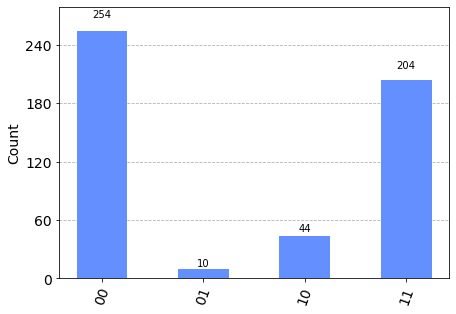

In [80]:
quantum_result = job.result()
plot_histogram(quantum_result.get_counts(circuit))

In [82]:
%qiskit_disable_job_watcher    # Disabling th ewatcher, cuz our job is completed